In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [2]:
# Input data files consisting of the images
olivetti_data = fetch_olivetti_faces()
features = olivetti_data.data
targets = olivetti_data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
print("features: ", features.shape)
print("targets: ", targets.shape)

features:  (400, 4096)
targets:  (400,)


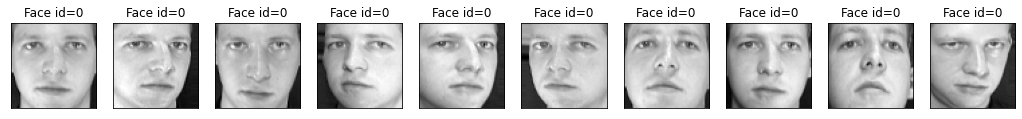

In [4]:
# let's plot the 10 images for the first person (face id =0)
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(18, 9))

for j in range(10):
    sub_plots[j].imshow(features[j].reshape(64, 64), cmap="gray")
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title("Face id=0")
plt.show() 

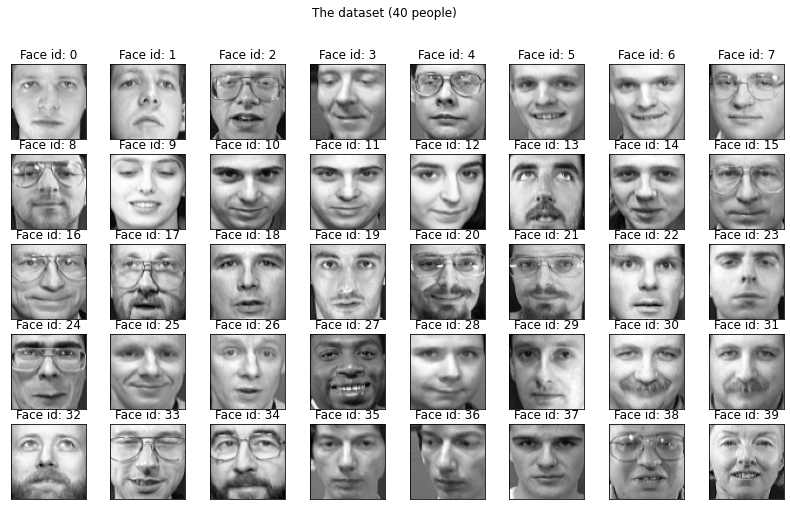

In [5]:
#All unique faces in the sample
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14, 8))

sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets):
    image_index = unique_user_id * 8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_yticks([])
    sub_plots[unique_user_id].set_title("Face id: %s" % unique_user_id)

plt.suptitle("The dataset (40 people)")
plt.show()

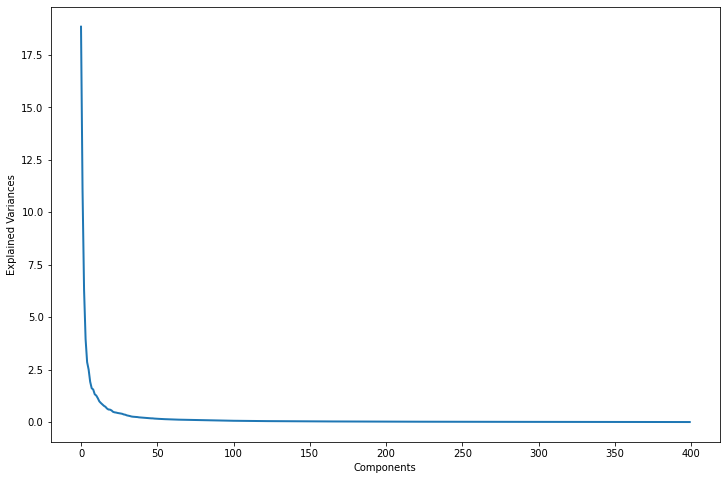

In [6]:
# split the original data-set (training and test set)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

# let's try to find the optimal number of eigenvectors (principle components)
pca = PCA()
pca.fit(features)

plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

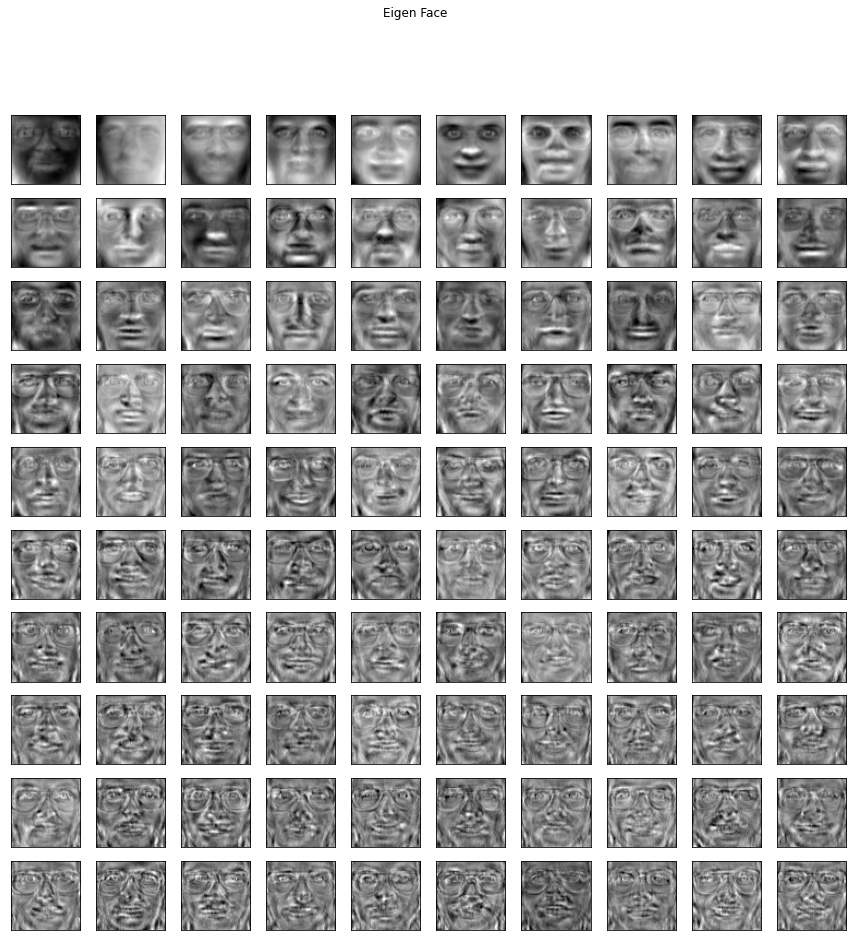

In [7]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
X_pca = pca.fit_transform(features)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform((X_test))

# after we find the optimal 100 PCA numbers we can check the "eigenfaces"
# principle component (eigenvector) has 4096 features
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces):
    sub_plots[i].imshow(eigen_faces[i], cmap='gray')
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])

plt.suptitle("Eigen Face")
plt.show()

In [ ]:
# let's use the machine learning models
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

for name, model in models:

    classifier_model = model
    classifier_model.fit(X_train_pca, y_train)

    y_predicted = classifier_model.predict(X_test_pca)
    print("Results with %s" % name)
    print("Accuracy score: %s" % (metrics.accuracy_score(y_test, y_predicted)))

In [ ]:
# let's use the machine learning models
# after using cross validation 
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_score = cross_val_score(model, X_pca, targets, cv=kfold)
    print("Mean of the cross-validation scores: %s" % cv_score.mean())